# Импортируем данные

Идеи/примеры/подсказки по работе с matplotlib, seaborn, pandas:
* https://matplotlib.org/stable/gallery/index.html
* https://seaborn.pydata.org/
* https://pandas.pydata.org/docs/user_guide/visualization.html



---



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Датасет лежит по ссылке: https://drive.google.com/file/d/18Q2u8KS2s2Ow8IEwp1n7wHUJs8GOocKL/view?usp=sharing

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=18Q2u8KS2s2Ow8IEwp1n7wHUJs8GOocKL

Downloading...
From: https://drive.google.com/uc?id=18Q2u8KS2s2Ow8IEwp1n7wHUJs8GOocKL
To: /content/WA_Fn-UseC_-Telco-Customer-Churn.csv
100% 978k/978k [00:00<00:00, 57.9MB/s]


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')



---



# Основная информация о данных

Первые 5 строк:

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Поля в датафрейме:

*   customerID - идентификатор клиента
*   gender - пол
* SeniorCitizen - флаг пенсионера
* Partner - флаг наличия семейных отношений
* Dependents - флаг наличия иждивенцев в семье
* tenure -количество месяцев, которое клиент остается с кампанией
* PhoneService - флаг подключения телефонных сервисов
** MultipleLines - флаг подключения нескольких телефонных линий
* InternetService - тип интернета, предоставляемого провайдером
** OnlineSecurity - флаг подключения онлайн защиты
** OnlineBackup - флаг наличия онлайнового резервного копирования
** DeviceProtection - флаг подключения защиты устройства
** TechSupport - флаг наличия технической поддержки
** StreamingTV - флаг наличия ТВ
** StreamingMovies - флаг наличия доступа к фильмам
* Contract- тип контракта
* PaperlessBilling - флаг выставления электронного счета
* PaymentMethod - способ оплаты
* MonthlyCharges - расмер месячной платы за услуги
* TotalCharges - выплачено клиентом за все время жизни в компании
* Churn - флаг оттока 




Первые 3 строки:

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Размер датафрейма:

In [ ]:
df.shape

(7043, 21)

Информация о столбцах:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Видим, что столбец TotalCharges принимает значение object вместо float64. Изменение типа столбца на числовой:

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

Проверим, что изменение прошло успешно:

In [ ]:
df['TotalCharges'].dtypes

dtype('float64')

Основные метрики по столбцам, принимающим количественные значения: количество заполненных значений по столбцу, среднее, среднеквадратическое отклонение, минимальное и максимальное значение, персентили.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Как будем задавать вопросы к нашим данным? Например, сколько в месяц платят клиенты за услуги в зависимости от пола.

Выделим мужчин:

In [ ]:
df[df['gender'] == 'Male'].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Посимотрим на распределение по полу:

In [ ]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

В зависимости от пола посчитаем среднее значение платы за услуги:

In [ ]:
df[df['gender'] == 'Female']['MonthlyCharges'].mean(),\
df[df['gender'] == 'Male']['MonthlyCharges'].mean()

(65.20424311926602, 64.32748241912773)

Можно прописывать сложные условия с помощью логических операторов:

In [ ]:
df[(df['gender'] == 'Male') & (df['Partner'] == 'No')]['MonthlyCharges'].median()

62.8



---



# Визуализация признаков


Рассмотрим способы визуализации в зависимости от типа признака: количественный, категориальный/бинарный.

# Количественные признаки


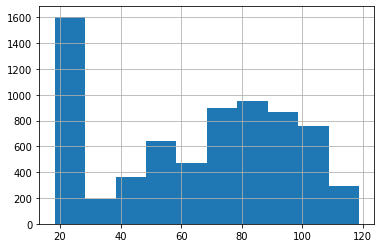

In [ ]:
df['MonthlyCharges'].hist();

Boxplot ("ящик с усами"):

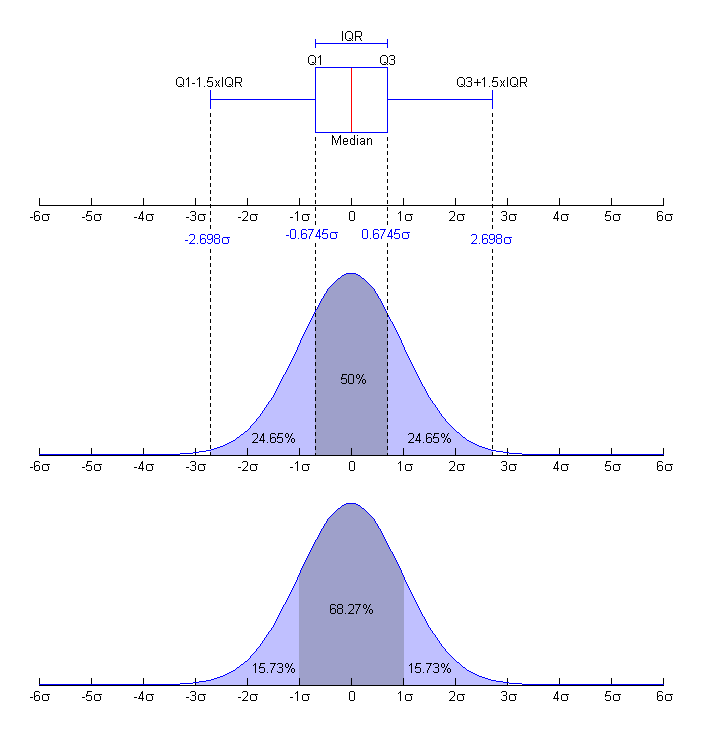

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


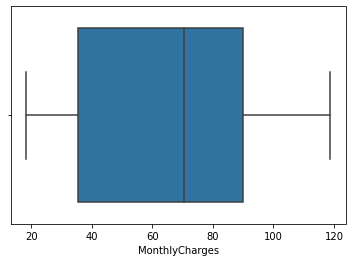

In [ ]:
sns.boxplot(df['MonthlyCharges']);

Вспоминаем, что есть метод describe - без картинок, но все те же показатели:

In [ ]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Можем построить гистограммы сразу по всем количественным признакам:

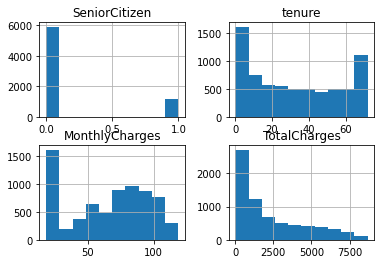

In [ ]:
df.hist();

# Категориальные/бинарные признаки

Распределение признака по частоте (можно добавить .head(), если признак принимает много значений):

In [ ]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Визуализировать категориальный признак с помощью seaborn (нельзя использовать для количественного признака, будет очень долго работать):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


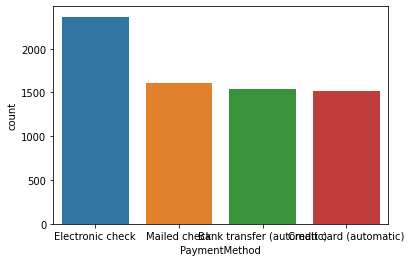

In [ ]:
sns.countplot(df['PaymentMethod']);

Иногда бывает потребность нарисовать диаграмму не по всем значениям признака, а только по максимальным N. 
Нарисуем картинку по трем самым популярным способам оплаты. Определим значения признака, являющиеся тремя самыми часто встречающимися:

In [ ]:
df['PaymentMethod'].value_counts().head(3).index

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)'], dtype='object')

Сделаем фильтр на то, что способ оплаты находится среди самых популярных. Используем метод isin:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


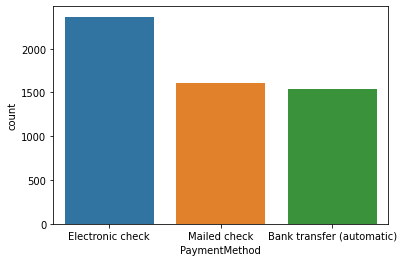

In [ ]:
sns.countplot(df[df['PaymentMethod'].isin(df['PaymentMethod'].value_counts().head(3).index)]['PaymentMethod']);

Построим разбивку по переменной Churn:

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


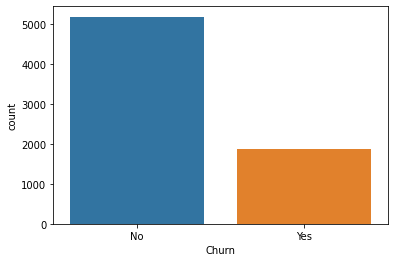

In [ ]:
sns.countplot(df['Churn']);



---



# Взаимодействие признаков
Возможно три варианта:
количественный - количественный, количественный - категориальный (бинарный), категориальный - категориальный.

# Количественный - количественный

Используем диаграммы рассеяния. Построим их для всех количественных признаков:

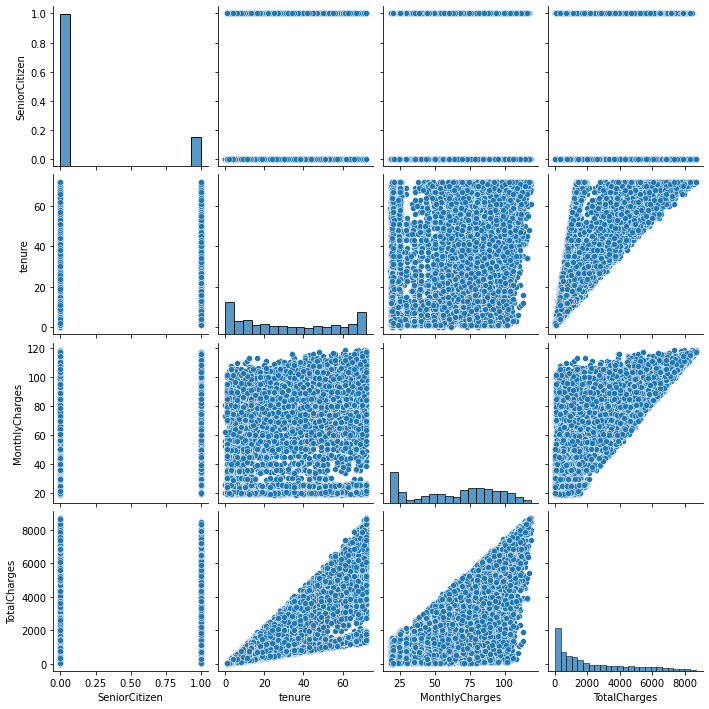

In [ ]:
sns.pairplot(df);

Изобразим диаграмму рассеяния по двум переменным MonthlyCharges и tenure:

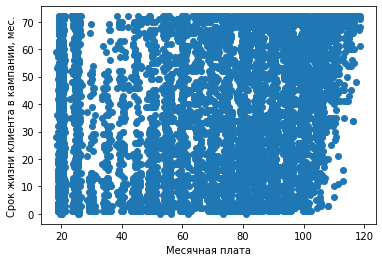

In [ ]:
plt.scatter(df['MonthlyCharges'],df['tenure']);
plt.xlabel('Месячная плата');
plt.ylabel('Срок жизни клиента в кампании, мес.');

Раскрасим точки по факту оттока. Приведем в соответствие значение поля Churn и цвет:

In [ ]:
df['Churn'].map({'No': 'blue', 'Yes': 'orange'}).head()

0      blue
1      blue
2    orange
3      blue
4    orange
Name: Churn, dtype: object

Построим диаграмму рассеяния:

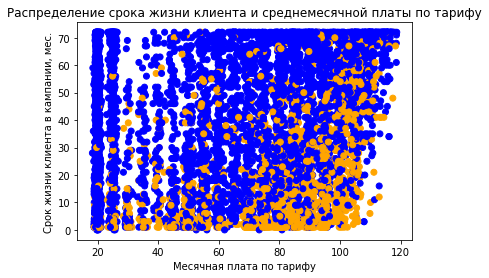

In [ ]:
plt.scatter(df['MonthlyCharges'],df['tenure'], 
            color=df['Churn'].map({'No': 'blue', 'Yes': 'orange'})
            );
plt.title('Распределение срока жизни клиента и среднемесячной платы по тарифу');
plt.xlabel('Месячная плата по тарифу');
plt.ylabel('Срок жизни клиента в кампании, мес.');

Видим зависимость: клиенты, которые много платят и мало месяцев находятся в кампании, с большей вероятностью уйдут.

Выделим клиентов, которые ушли, в отдельную диаграмму. Нужна фильтрация:

In [ ]:
df[df['Churn'] == 'Yes'].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


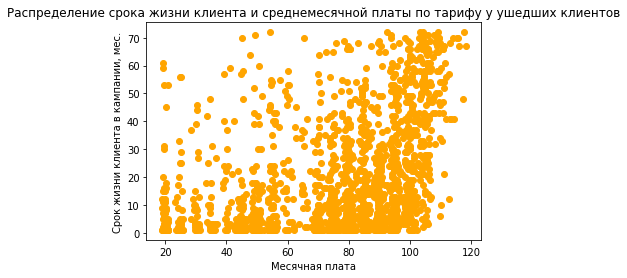

In [ ]:
l1 =plt.scatter(df[df['Churn'] == 'Yes']['MonthlyCharges'],df[df['Churn'] == 'Yes']['tenure'],color='orange');
plt.xlabel('Месячная плата');
plt.ylabel('Срок жизни клиента в кампании, мес.');
plt.title('Распределение срока жизни клиента и среднемесячной платы по тарифу у ушедших клиентов');

Проверим скоррелированность признаков:

In [ ]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


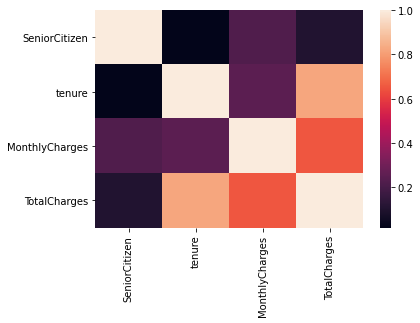

In [ ]:
sns.heatmap(df.corr());

Удаление скоррелированных признаков: TotalCharges

In [ ]:
df.drop('TotalCharges',axis=1,inplace=True)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

# Количественный - категориальный

Рассмотрим, различаются ли значения по признаку MonthlyCharges при каждом из значении Churn:

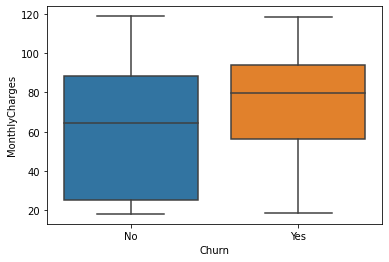

In [ ]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df);

Видим, что медианы сильно отличаются. Нам стоит обратить внимание на этот признах.

Другой способ визуализации. По нему сложнее сделать выводы:

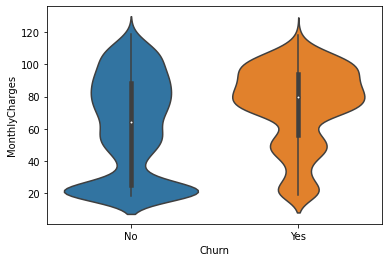

In [ ]:
sns.violinplot(x='Churn',y='MonthlyCharges',data=df);

# Категориальный - категориальный

Можно посмотреть в таблице объемы в разбивке по значениям признаков:

In [ ]:
pd.crosstab(df['Churn'],df['InternetService'])

InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113


Смотрим на признак InternetService в пересечении с Churn:

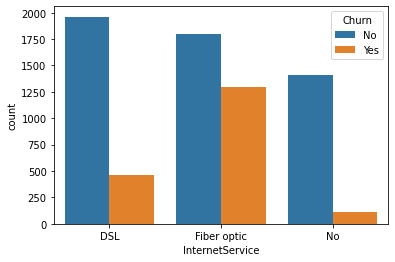

In [ ]:
sns.countplot(x='InternetService',hue='Churn',data = df);

Видим, что при значении InternetService = 'Fiber optic' очень велика доля оттока. В дальнейшем стоит обратить внимание на эту переменную.